In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------ --------------------------- 3.9/12.8 MB 31.0 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 28.9 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 25.2 MB/s  0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:

X, y_true = make_blobs(
    n_samples=500,      # number of points
    centers=4,          # true number of clusters
    cluster_std=0.60,   # cluster spread
    random_state=0
)

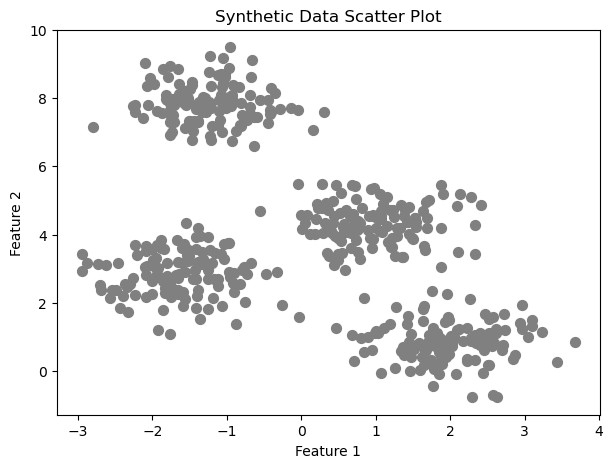

In [ ]:

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("Synthetic Data Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

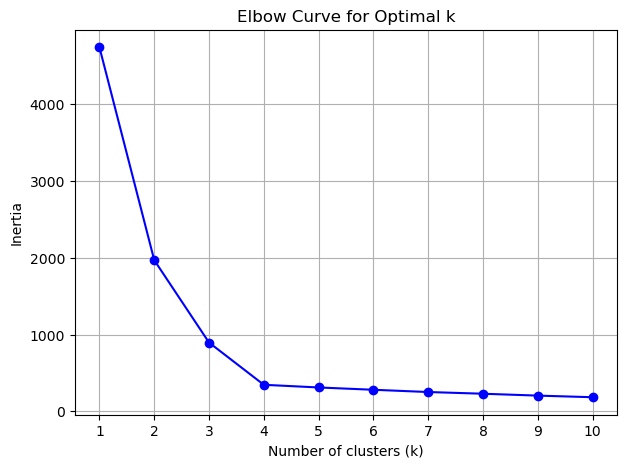

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

In [ ]:
k_opt = 4  
kmeans = KMeans(n_clusters=k_opt, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


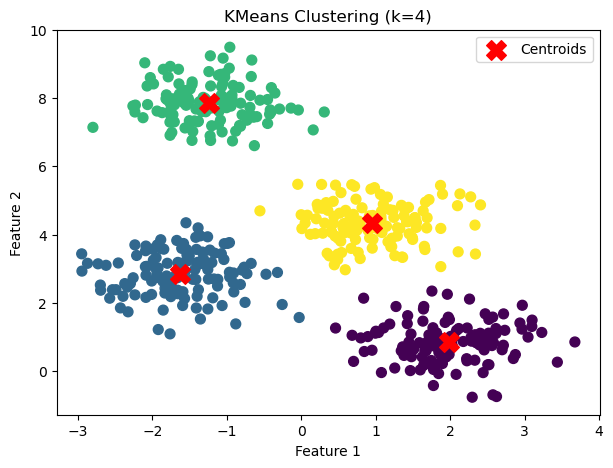

[[ 1.9896518   0.85486599]
 [-1.62397851  2.84672953]
 [-1.23719873  7.85161617]
 [ 0.94866739  4.33099426]]


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'KMeans Clustering (k={k_opt})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
print(centers)

In [ ]:
# predicting the clusters for new data points
new_points = np.array([[0, 4], [3, 6], [5, 1]])
print('Predicted Clusters for new points:', kmeans.predict(new_points))


Predicted Clusters for new points: [3 3 0]


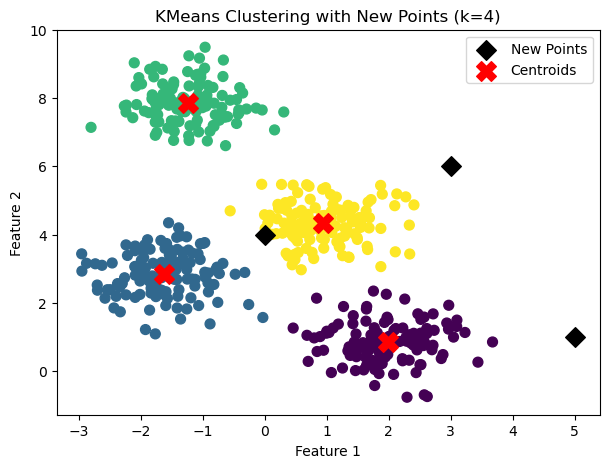

In [ ]:
#plot new ploints with clusters
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, marker='D', label='New Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'KMeans Clustering with New Points (k={k_opt})')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
!pip install kneed

Access is denied.


In [ ]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [5]:
# make more numer of clusters
inertia = []
K = range(1, 21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
#plot grpah of inertia vs k
plt.figure(figsize=(7,5))   
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Curve for Optimal k (1-20)')

NameError: name 'X' is not defined

NameError: name 'KneeLocator' is not defined

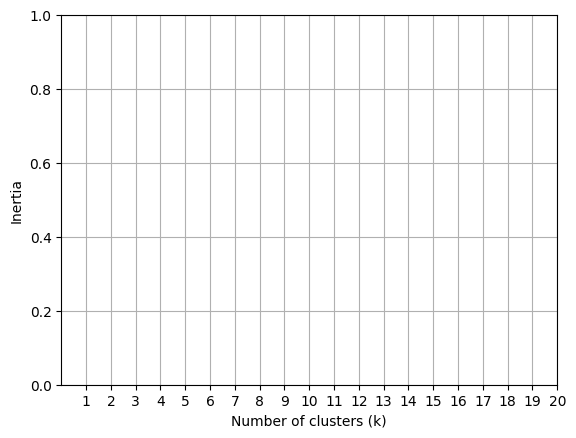

In [10]:
    # Calsulate kneelocator and plot it wiht elbow point and wcsss line
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')   
plt.xticks(K)
plt.grid(True)
kneedle = KneeLocator(K, inertia, S=1.0, curve="convex", direction="decreasing")
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow Point')
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Curve for Optimal k (1-20)')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow Point')

plt.legend()

In [ ]:
#silhouette score calculate and cluster validation
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for k=4: {score}')


In [11]:
#plot cluseter made usign the silhuette score
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title(f'KMeans Clustering (Silhouette Score: {score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title(f'KMeans Clustering (Silhouette Score: {score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


NameError: name 'X' is not defined

<Figure size 700x500 with 0 Axes>

In [ ]:
#plot silhouette score for different k values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')
plt.figure(figsize=(7,5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()